# 스피어만 상관분석
- 스피어만 상관계수는 두 변수 간의 `순위 순서를 기반`으로 상관관계를 축정
- `순위 데이터 또는 서열 데이터`에서 사용되며, 정확한 값보다 `상대적인 순위`가 중요한 경우 사용
- **값 자체보다는 값의 `상대적인 순위`가 중요**
    > 예) 자동차 성능 순위, 음악 차트 등의 데이터 유형
- 피어슨 상관계수보다는 `이상치에 강건`(이상치 어느정도 있어도됨)하며, `비선형적인 관계`도 잘 캡처 가능
- 값의 범위: `-1 에서 +1`
    - 1에 가까울수록 양의 상관관계
    - -1에 가까울수록 음의 상관관계
    - 0에 가까울수록 상관관계가 없음

## 1. 작업 준비
### 패키지 참조

In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import spearman_r

### 데이터 가져오기

In [2]:
df = read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 데이터 전처리
- 종속변수(`mpg`)와 명목형 변수들 추출

In [11]:
df2 = df.filter(['mpg', 'vs', 'am', 'gear', 'carb'])
df2

,mpg,vs,am,gear,carb
name,,,,,
Mazda RX4,21.0,0,1,4,4
Mazda RX4 Wag,21.0,0,1,4,4
Datsun 710,22.8,1,1,4,1
Hornet 4 Drive,21.4,1,0,3,1
Hornet Sportabout,18.7,0,0,3,2
Valiant,18.1,1,0,3,1
Duster 360,14.3,0,0,3,4
Merc 240D,24.4,1,0,4,2
Merc 230,22.8,1,0,4,2


## 2. 산점도 행렬 시각화
### 그래프 전역 설정

In [12]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.unicode_minus"] = False

### 산점도 행렬
- `seaborn.pairplot(데이터프레임)`
- 명목형 변수에 따라 데이터가 몰려 있기 때문에 파악이 어렵다.

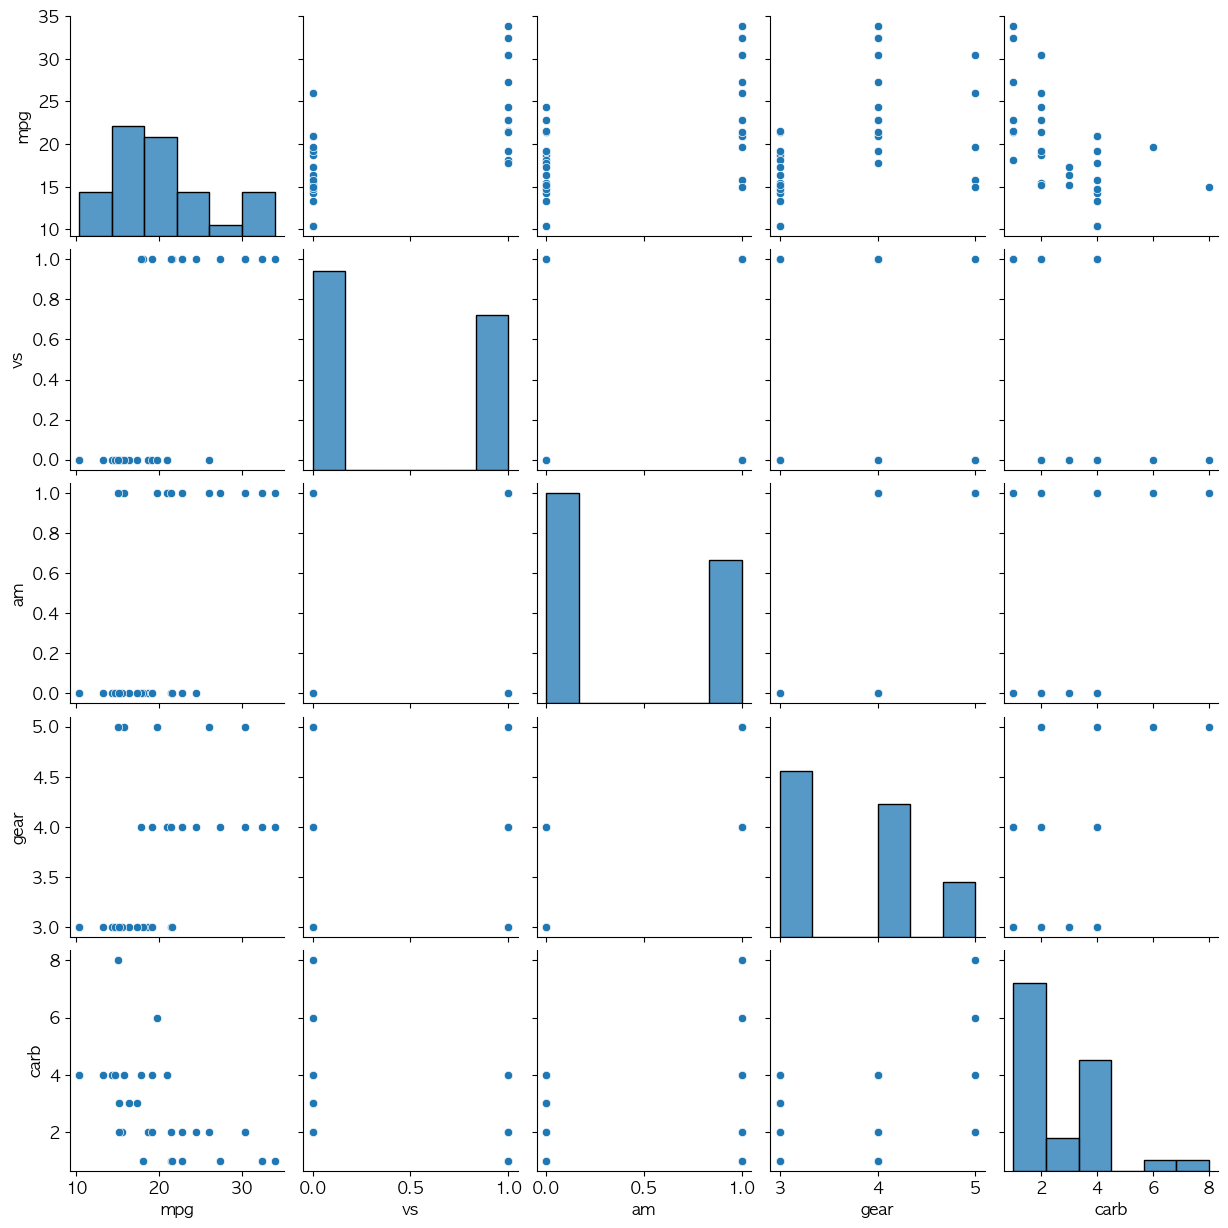

In [13]:
sb.pairplot(df2)
plt.show()
plt.close()

## 3. 스피어만 상관분석
### 1) 상관행렬
- `데이터프레임.corr(method = 'spearman')`
> 피어슨은 `데이터프레임.corr(method = 'pearson')`

In [14]:
df2.corr(method='spearman')

,mpg,vs,am,gear,carb
mpg,1.000000,0.706597,0.562006,0.542782,-0.657498
vs,0.706597,1.000000,0.168345,0.282662,-0.633695
am,0.562006,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,0.282662,0.807688,1.000000,0.114887
carb,-0.657498,-0.633695,-0.064365,0.114887,1.000000


#### 시각화
- searborn.heatmap(데이터프레임.corr(method='spearman'), annot=True)

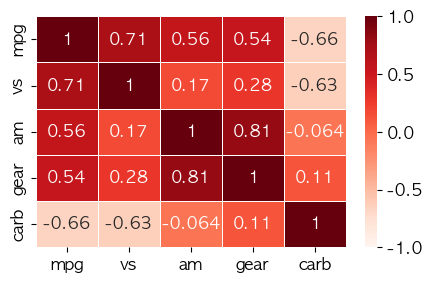

In [17]:
plt.rcParams["figure.figsize"] = (5,3)
sb.heatmap(df2.corr(method='spearman'), annot = True, 
                                        cmap = 'Reds', 
                                        vmin = -1, vmax=1, 
                                        linewidths=.5)
plt.show()
plt.close()

### 2) 결과 검정
- `stats.spearmanr(데이터프레임컬럼1, 데이터프레임컬럼2)`

In [18]:
stats.spearmanr(df2['mpg'], df2['vs'])

SignificanceResult(statistic=0.7065967937356457, pvalue=6.191449807290846e-06)

- spearman_r(데이터프레임)은 helper 모듈에 정의한 함수

In [20]:
spearman_r(df2)

,statistic,pvalue:,result
fields,,,
mpg vs vs,0.706597,6.191450e-06,True
vs vs am,0.168345,3.570439e-01,False
am vs gear,0.807688,2.304063e-08,True
gear vs carb,0.114887,5.312358e-01,False
carb vs mpg,-0.657498,4.337570e-05,True
